## import Libraries

In [56]:
import pandas as pd
import numpy as np
import datetime as dt
from tqdm.notebook import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from ast import literal_eval
from statistics import median
import statistics
import math
pd.set_option('display.max_columns', None)
from matplotlib import pyplot
import seaborn as sn
from scipy.stats import pearsonr
import numpy as np

## Read Files

In [57]:
# Load files into a pandas dataframe
train = pd.read_csv('C:\Solar Credit Repayment\Train.csv')
test = pd.read_csv('C:\Solar Credit Repayment\Test.csv')
ss = pd.read_csv('C:\Solar Credit Repayment\SampleSubmission.csv')
metadata = pd.read_csv('C:\Solar Credit Repayment\metadata.csv')

In [58]:
train

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6
0,ID_MR53LEX,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0
1,ID_3D7NQUH,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0
2,ID_0IWQNPI,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0
3,ID_IY8SYB9,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0
4,ID_9XHL7VZ,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0
...,...,...,...,...,...,...,...,...,...
28002,ID_CDZ24L9,"['03-2018', '04-2018', '05-2018', '06-2018', '...","[5235.0, 1270.0, 940.0, 1370.0, 2020.0, 1750.0...",1640.0,1550.0,2045.0,850.0,1730.0,720.0
28003,ID_0XINELS,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2980.0, 1000.0, 450.0, 1050.0, 850.0, 1250.0,...",900.0,950.0,650.0,750.0,1200.0,620.0
28004,ID_PAU9JJU,"['01-2020', '02-2020', '03-2020', '04-2020', '...","[2580.0, 1020.0, 540.0, 360.0, 200.0, 660.0, 1...",680.0,460.0,799.0,1070.0,820.0,401.0
28005,ID_K866QHS,"['02-2018', '03-2018', '04-2018', '05-2018', '...","[2000.0, 1160.0, 1240.0, 1120.0, 1000.0, 1200....",1300.0,1055.0,1200.0,1200.0,1080.0,800.0


In [59]:

metadata.head()

,ID,RegistrationDate,Deposit,UpsellDate,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,SupplierName,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate
0,ID_K00S4N4,2015-12-10 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Male,41.0,Mount Kenya Region,Embu,Other,d_light,364,14740.0,2016-12-08 00:00:00,2015-12-10 09:52:35,2016-10-23 04:52:30
1,ID_6L67PAA,2015-12-09 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Male,33.0,Coast Region,Kilifi,Other,d_light,364,14740.0,2016-12-07 00:00:00,2015-12-09 13:14:03,2020-05-24 15:32:18
2,ID_102CV85,2015-12-18 00:00:00,2000,2018-03-29 10:14:58,35.0,FINANCED,DAILY,35,7,Female,48.0,Nairobi Region,Makueni,Business,d_light,392,29480.0,2017-01-13 00:00:00,2015-12-18 06:22:34,2017-02-01 15:23:44
3,ID_HXBJFHB,2015-11-25 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Female,43.0,NaN,UNKNOWN,Teacher,d_light,364,14740.0,2016-11-23 00:00:00,2015-11-25 13:25:57,2017-05-22 16:46:54
4,ID_3K9VZ5J,2015-12-02 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Female,56.0,Mount Kenya Region,Kirinyaga,Other,d_light,364,14740.0,2016-11-30 00:00:00,2015-12-05 10:34:32,2017-05-12 16:50:52


In [60]:
test

,ID,TransactionDates,PaymentsHistory
0,ID_6L67PAA,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]"
1,ID_VJ80SX2,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ..."
2,ID_7OU9HLK,"['12-2015', '01-2016', '03-2016', '05-2016', '...","[2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87..."
3,ID_WVWTPGK,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,..."
4,ID_04DSDQS,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1..."
...,...,...,...
9331,ID_ATLMXQX,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2690.0, 270.0, 770.0, 1100.0, 700.0, 550.0, 5..."
9332,ID_DYMC72D,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2950.0, 1550.0, 1500.0, 900.0, 80.0, 1550.0, ..."
9333,ID_5CBGHCN,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2550.0, 500.0, 550.0, 250.0, 200.0, 450.0, 45..."
9334,ID_HYHB585,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2700.0, 800.0, 250.0, 300.0, 1100.0, 950.0, 8..."


## Get all the required Payment History details for Train Dataset

In [61]:
from collections import OrderedDict
from dateutil.parser import parse

p_pay = []
p_date = []
all_dates = []
all_pays = []
train_listed_values = []
value = []
for i in range(28007):
    a = train['TransactionDates'][i]
    b= [i.split('/')[-1] for i in literal_eval(a)]
    all_dates.append(b)


    c = train['PaymentsHistory'][i]
    d = [i for i in literal_eval(c)]
    all_pays.append(d)

for i in range(28007):
    dict_one = dict(zip(all_dates[i], all_pays[i]))
    new_dict_P = OrderedDict(sorted(dict_one.items(), key=lambda x: parse(x[0])))
    if len(new_dict_P)<6:
        value.append(i)
        new_dict_P[all_dates[i][0]+ '1'] = all_pays[i][0]
        for x in list(new_dict_P)[-6:]:
            train_listed_values.append(new_dict_P[x])      
    else:
        for x in list(new_dict_P)[-6:]:
            train_listed_values.append(new_dict_P[x])


## Get all the required Payment History details for Test Dataset

In [62]:
p_pay = []
p_date = []
all_dates = []
all_pays = []
test_listed_values = []
value = []
for i in range(9336):
    a = test['TransactionDates'][i]
    b= [i.split('/')[-1] for i in literal_eval(a)]
    all_dates.append(b)

    c = test['PaymentsHistory'][i]
    d = [i for i in literal_eval(c)]
    all_pays.append(d)

for i in range(9336):
    dict_one = dict(zip(all_dates[i], all_pays[i]))
    new_dict_P = OrderedDict(sorted(dict_one.items(), key=lambda x: parse(x[0])))
    if len(new_dict_P)<6:
        value.append(i)
        new_dict_P[all_dates[i][0]+ '1'] = all_pays[i][0]
        for x in list(new_dict_P)[-6:]:
            test_listed_values.append(new_dict_P[x])    
    else:
        for x in list(new_dict_P)[-6:]:
            test_listed_values.append(new_dict_P[x])



In [63]:
len(train_listed_values)

168042

## Create Dataset

In [64]:
def create_Month_Data(train, month):

    month_1 = [month]
    id_list = train['ID'].tolist()
    m_one = train[month].tolist()
    pay_list = train['PaymentsHistory'].tolist()
    transact_list = train['TransactionDates'].tolist()
    train_one= pd.DataFrame({
        'ID X Month':np.concatenate([[str(c) + " x " + str(x) 
                                                for c in id_list] 
                                                for x in month_1])})
    train_one['TransactionDates'] = transact_list
    train_one['PaymentsHistory'] = pay_list
    train_one['ID'] = id_list
    train_one['target'] = m_one
    return train_one
    
# Use the Function
train_month_one = create_Month_Data(train, month = 'm1')
train_month_two =create_Month_Data(train, month = 'm2')
train_month_three = create_Month_Data(train, month = 'm3')
train_month_four = create_Month_Data(train, month = 'm4')
train_month_five = create_Month_Data(train, month = 'm5')
train_month_six = create_Month_Data(train, month = 'm6')


def test_create_Data(train, month):

    month_1 = [month]
    id_list = test['ID'].tolist()
    pay_list = train['PaymentsHistory'].tolist()
    transact_list = train['TransactionDates'].tolist()
    train_one= pd.DataFrame({
        'ID X Month':np.concatenate([[str(c) + " x " + str(x) 
                                                for c in id_list] 
                                                for x in month_1])})
    train_one['TransactionDates'] = transact_list
    train_one['PaymentsHistory'] = pay_list
    train_one['ID'] = id_list
    return train_one
    
# Use the Function
test_month_one = test_create_Data(test, month = 'm1')
test_month_two =test_create_Data(test, month = 'm2')
test_month_three = test_create_Data(test, month = 'm3')
test_month_four = test_create_Data(test, month = 'm4')
test_month_five = test_create_Data(test, month = 'm5')
test_month_six = test_create_Data(test, month = 'm6')


In [65]:
# COMBINE ALL DATAFRAMES TOGETHER
train_all = pd.concat([train_month_one, train_month_two, train_month_three, train_month_four, train_month_five, train_month_six])
test_all = pd.concat([test_month_one, test_month_two, test_month_three, test_month_four, test_month_five, test_month_six])

train_all = train_all.reset_index()
test_all = test_all.reset_index()
del train_all['index']
del test_all['index']

In [66]:
train_all

,ID X Month,TransactionDates,PaymentsHistory,ID,target
0,ID_MR53LEX x m1,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",ID_MR53LEX,880.0
1,ID_3D7NQUH x m1,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",ID_3D7NQUH,660.0
2,ID_0IWQNPI x m1,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",ID_0IWQNPI,700.0
3,ID_IY8SYB9 x m1,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",ID_IY8SYB9,580.0
4,ID_9XHL7VZ x m1,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",ID_9XHL7VZ,40.0
...,...,...,...,...,...
168037,ID_CDZ24L9 x m6,"['03-2018', '04-2018', '05-2018', '06-2018', '...","[5235.0, 1270.0, 940.0, 1370.0, 2020.0, 1750.0...",ID_CDZ24L9,720.0
168038,ID_0XINELS x m6,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2980.0, 1000.0, 450.0, 1050.0, 850.0, 1250.0,...",ID_0XINELS,620.0
168039,ID_PAU9JJU x m6,"['01-2020', '02-2020', '03-2020', '04-2020', '...","[2580.0, 1020.0, 540.0, 360.0, 200.0, 660.0, 1...",ID_PAU9JJU,401.0
168040,ID_K866QHS x m6,"['02-2018', '03-2018', '04-2018', '05-2018', '...","[2000.0, 1160.0, 1240.0, 1120.0, 1000.0, 1200....",ID_K866QHS,800.0


In [67]:
test_all

,ID X Month,TransactionDates,PaymentsHistory,ID
0,ID_6L67PAA x m1,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]",ID_6L67PAA
1,ID_VJ80SX2 x m1,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ...",ID_VJ80SX2
2,ID_7OU9HLK x m1,"['12-2015', '01-2016', '03-2016', '05-2016', '...","[2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87...",ID_7OU9HLK
3,ID_WVWTPGK x m1,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,...",ID_WVWTPGK
4,ID_04DSDQS x m1,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1...",ID_04DSDQS
...,...,...,...,...
56011,ID_ATLMXQX x m6,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2690.0, 270.0, 770.0, 1100.0, 700.0, 550.0, 5...",ID_ATLMXQX
56012,ID_DYMC72D x m6,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2950.0, 1550.0, 1500.0, 900.0, 80.0, 1550.0, ...",ID_DYMC72D
56013,ID_5CBGHCN x m6,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2550.0, 500.0, 550.0, 250.0, 200.0, 450.0, 45...",ID_5CBGHCN
56014,ID_HYHB585 x m6,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2700.0, 800.0, 250.0, 300.0, 1100.0, 950.0, 8...",ID_HYHB585


## Calculate the Mean of the PaymentHistory of each Customer, the Most Common pay, the Highest Pay, the Lowest Pay, the Standard Deviation and Median

In [68]:
train_all.shape

(168042, 5)

In [69]:
## Covert PaymentsHistory Column to list
def create_PaymentHistory_List(train, length):

    all_Payments_List = [] 
    for i in range(length):
        per_row = (train.loc[i, 'PaymentsHistory'])
        per_row = per_row.replace("[", "")
        per_row = per_row.replace("]", "")
        number_string = per_row.split(',')
        number_string = [float(i) for i in number_string]
        all_Payments_List.append(number_string)
    return all_Payments_List

all_pay_list = create_PaymentHistory_List(train_all, 168042)

test_all_pay_list = create_PaymentHistory_List(test_all, 56016)

## Calculate Mean

In [70]:
def calculate_Mean(train, all_pay_list, length):
    mean_list = []
    def Average(lst):
        return sum(lst) / len(lst)
    for i in range(length):
        # print(i)
        val_list = all_pay_list[i]
        avg_val = Average(val_list)
        avg_val  = round(avg_val, 0)
        mean_list.append(avg_val)
    train['Mean_PaymentsHistory'] = mean_list
    return train

train_all = calculate_Mean(train_all, all_pay_list, length=168042)

test_all = calculate_Mean(test_all, test_all_pay_list, length = 56016)


## Calculate Median

In [71]:
def calculate_Median(train, all_pay_list, length):
    median_list = []
    for i in range(length):
        val_list = all_pay_list[i]
        val_list = median(val_list)
        median_list.append(val_list)
    train['Median_PaymentsHistory'] = median_list
    return train

train_all = calculate_Median(train_all, all_pay_list, length=168042)

test_all = calculate_Median(test_all, test_all_pay_list, length = 56016)


## Calculate Mode

In [72]:
def calculate_Mode(train, all_pay_list, length):
    mode_list = []
    for i in range(length):
        val_list = all_pay_list[i]
        val_list = statistics.mode(val_list)
        mode_list.append(val_list)
    train['MostCommon_PaymentsHistory'] = mode_list
    return train

train_all = calculate_Mode(train_all, all_pay_list, length= 168042)

test_all = calculate_Mode(test_all, test_all_pay_list, length= 56016)


## Calculate Variance

In [73]:
def calculate_Variance(train, all_pay_list, length):
    list_all = []
    for i in range(length):
        val_list = all_pay_list[i]
        val_list = statistics.variance(val_list)
        val_list  = round(val_list, 2)
        list_all.append(val_list)
    train['variance_PaymentsHistory'] = list_all
    return train

train_all = calculate_Variance(train_all, all_pay_list, length = 168042)

test_all = calculate_Variance(test_all, test_all_pay_list, length = 56016)


## Standard Deviation

In [74]:
statistics.stdev
def calculate_Stdev(train, all_pay_list, length):
    list_all = []
    for i in range(length):
        val_list = all_pay_list[i]
        val_list = statistics.stdev(val_list)
        val_list  = round(val_list, 2)
        list_all.append(val_list)
    train['stdev_PaymentsHistory'] = list_all
    return train

train_all = calculate_Stdev(train_all, all_pay_list, length = 168042)

test_all = calculate_Stdev(test_all, test_all_pay_list, length = 56016)

## Get the Highest Pay 

In [76]:
def create_Highest_Pay(train, all_pay_list, length):
    list_all = []
    for i in range(length):
        val_list = all_pay_list[i]
        val_list = max(val_list)
        list_all.append(val_list)
    train['HighestPay_PaymentsHistory'] = list_all
    return train

train_all = create_Highest_Pay(train_all, all_pay_list, length = 168042)

test_all = create_Highest_Pay(test_all, test_all_pay_list, length = 56016)

## Get the Lowest Pay

In [77]:
def create_Lowest_Pay(train, all_pay_list, length):
    list_all = []
    for i in range(length):
        val_list = all_pay_list[i]
        val_list = min(val_list)
        list_all.append(val_list)
    train['LowestPay_PaymentsHistory'] = list_all
    return train

train_all = create_Lowest_Pay(train_all, all_pay_list, length = 168042)

test_all = create_Lowest_Pay(test_all, test_all_pay_list, length = 56016)

## Sum all PaymentHistory

In [78]:
def create_Sum_Pay(train, all_pay_list, length):
    list_all = []
    for i in range(length):
        val_list = all_pay_list[i]
        val_list = sum(val_list)
        list_all.append(val_list)
    train['Sum_PaymentsHistory'] = list_all
    return train

train_all = create_Sum_Pay(train_all, all_pay_list, length = 168042)

test_all = create_Sum_Pay(test_all, test_all_pay_list, length = 56016)

In [79]:
test_all.head(2)

,ID X Month,TransactionDates,PaymentsHistory,ID,Mean_PaymentsHistory,Median_PaymentsHistory,MostCommon_PaymentsHistory,variance_PaymentsHistory,stdev_PaymentsHistory,HighestPay_PaymentsHistory,LowestPay_PaymentsHistory,Sum_PaymentsHistory
0,ID_6L67PAA x m1,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]",ID_6L67PAA,1433.0,1050.0,1050.0,1648666.67,1284.00,4000.0,400.0,8600.0
1,ID_VJ80SX2 x m1,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ...",ID_VJ80SX2,1286.0,1000.0,3000.0,658095.24,811.23,3000.0,650.0,9000.0


In [80]:
train.head(2)

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6
0,ID_MR53LEX,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0
1,ID_3D7NQUH,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0


## Clean Metadata

In [81]:
# DELETE UPSELLDATE
del metadata['UpsellDate']

# FILL MISSING VALUES
metadata.Region.fillna(value=metadata.Region.mode()[0], inplace=True)
metadata.Age.fillna(value=round(metadata.Age.mean()), inplace=True)

## Specify Date Column types

In [82]:
skip_cols=["PaymentsHistory", "TransactionDates"]
cols = [col for col in metadata.columns[1:] if col not in skip_cols]
date_cols = [col for col in cols if 'Date' in col]

## Deal with Datetime


In [83]:
def time_features(train, type_Date):
  train['Datetime'] = pd.to_datetime(train[type_Date],format='%Y-%m-%d %H:%M:%S')

  train['dayofweek_num' + type_Date] = train['Datetime'].dt.dayofweek
  dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
  train['weekday'+ type_Date] = train['Datetime'].dt.dayofweek.map(dayOfWeek)
  train['quarter'+ type_Date] = train['Datetime'].dt.quarter
  train['month'+ type_Date] = train['Datetime'].dt.month
  train['year'+ type_Date] = train['Datetime'].dt.year
  train['dayofyear'+ type_Date] = train['Datetime'].dt.dayofyear
  train['dayofmonth'+ type_Date] = train['Datetime'].dt.day
  train['week'+ type_Date] = train['Datetime'].dt.week
  train['is_month_start'+ type_Date]=train['Datetime'].dt.is_month_start
  train['is_month_end'+ type_Date]=train['Datetime'].dt.is_month_end
  train['is_quarter_start'+ type_Date]=train['Datetime'].dt.is_quarter_start
  train['is_quarter_end'+ type_Date]=train['Datetime'].dt.is_quarter_end
  train['is_year_start'+ type_Date]=train['Datetime'].dt.is_year_start
  train['is_year_end'+ type_Date]=train['Datetime'].dt.is_year_end
  train['Semester'+ type_Date] = np.where(train['quarter'+ type_Date].isin([1,2]),1,2)
  train['Date'+ type_Date]=pd.factorize(train[type_Date])[0]
  train['is_weekend'+ type_Date] = (train['dayofweek_num' + type_Date] >= 5) * 1
  train['fortnight'+ type_Date] = train['dayofmonth'+ type_Date]%15
  train['which_fortnight'+ type_Date] = train['dayofmonth'+ type_Date]//15
  train['WeekOfyear'+ type_Date] = train['Datetime'].dt.weekofyear
#   train['RegisteredInLeapYear'] = train.RegistrationDate.dt.is_leap_year.astype('float')
  train['Hourofday'+ type_Date] = train.apply(lambda row: row['Datetime'].to_pydatetime().hour , axis=1)

for col in date_cols:
    time_features(metadata, type_Date=col)

cols = [col for col in metadata.columns[1:] if col not in skip_cols] 

## Specify Categorical Columns


In [84]:
skip_2_col = ['RegistrationDate','PaymentMethod', 'ExpectedTermDate','FirstPaymentDate','LastPaymentDate']
cat_cols = [col for col in cols if metadata[col].dtype == 'O' or metadata[col].dtype =='bool' if col not in skip_2_col]
print(cat_cols)

['rateTypeEntity', 'MainApplicantGender', 'Region', 'Town', 'Occupation', 'SupplierName', 'weekdayRegistrationDate', 'is_month_startRegistrationDate', 'is_month_endRegistrationDate', 'is_quarter_startRegistrationDate', 'is_quarter_endRegistrationDate', 'is_year_startRegistrationDate', 'is_year_endRegistrationDate', 'weekdayExpectedTermDate', 'is_month_startExpectedTermDate', 'is_month_endExpectedTermDate', 'is_quarter_startExpectedTermDate', 'is_quarter_endExpectedTermDate', 'is_year_startExpectedTermDate', 'is_year_endExpectedTermDate', 'weekdayFirstPaymentDate', 'is_month_startFirstPaymentDate', 'is_month_endFirstPaymentDate', 'is_quarter_startFirstPaymentDate', 'is_quarter_endFirstPaymentDate', 'is_year_startFirstPaymentDate', 'is_year_endFirstPaymentDate', 'weekdayLastPaymentDate', 'is_month_startLastPaymentDate', 'is_month_endLastPaymentDate', 'is_quarter_startLastPaymentDate', 'is_quarter_endLastPaymentDate', 'is_year_startLastPaymentDate', 'is_year_endLastPaymentDate']


## One Hot Encoding for Categorical Variables

In [85]:
metadata = pd.get_dummies(metadata, columns = cat_cols)

In [86]:
delete_col = ['RegistrationDate', 'PaymentMethod', 'ExpectedTermDate','FirstPaymentDate','LastPaymentDate', 'Datetime']
metadata = metadata.drop(delete_col, axis = 1)


## Feature Engineering on each listed Statistical Column

In [87]:
statistics_cols = ['Deposit', 'AccessoryRate', 'RatePerUnit', 'Age', 'TotalContractValue']

def bin_column(train, column_name, quantile, new_column_name):
    train[new_column_name] = pd.qcut(metadata[column_name], q=quantile, labels=False)
    return train

metadata = bin_column(metadata, 'Age', 4, 'Age_Bin')

metadata = bin_column(metadata, 'Deposit', 3, 'Deposit_Bin')

metadata = bin_column(metadata, 'RatePerUnit', 3, 'RatePerUnit_Bin')

metadata = bin_column(metadata, 'TotalContractValue', 3, 'TotalContractValue_Bin')

## Bin Payment History

## convert days to other datetime features


In [88]:
days_to_features_cols= ['DaysOnDeposit', 'Term']

def get_year_month_week_day(train, column_list, column_name):
    year_list = []
    month_list = []
    week_list = []
    for value in column_list:
        year = value / 365
        year = round(year, 2)
        year_list.append(year)
        month = value / 30
        month = round(month, 2)
        month_list.append(month)
        week = value / 7
        week = round(week, 2)
        week_list.append(week)
    train[column_name + '_year_list'] = year_list
    train[column_name + '_month_list'] = month_list
    train[column_name + '_week_list'] = week_list
    return train

deposit_days = metadata['DaysOnDeposit'].tolist()
metadata = get_year_month_week_day(metadata, deposit_days, 'DaysOnDeposit')

term_days = metadata['Term'].tolist()
metadata = get_year_month_week_day(metadata, term_days, 'Term')

## Merge train dataset and Metadata

In [89]:
train= pd.merge(train_all, metadata, on=['ID'])
test = pd.merge(test_all, metadata, on = ['ID'])

In [90]:
# REMOVE DATE COLUMN
all_cols = []
remove_col = ['TransactionDates', 'PaymentsHistory', 'ID'] 
train = train.drop(remove_col, axis = 1)
test = test.drop(remove_col, axis = 1)
all_cols = train.columns.tolist()

In [91]:
all_cols.remove('ID X Month')

In [92]:
all_cols.append('target_payment')

In [93]:
train.shape

(168042, 227)

In [94]:
train['target_payment'] = train_listed_values
test['target_payment'] = test_listed_values

## Correlation Analysis

In [95]:
pred_dict = {}
for column in all_cols:
  corr, _ = pearsonr(train['target'], train[column])
  pred_dict[column] = '%.3f'% corr
# Convert Dict to Dataframe
corr_df = pd.DataFrame(list(pred_dict.items()))
corr_df.sort_values(by=[1], inplace=True, ascending=False)

In [103]:
corr_df.head(10)

,0,1
139,SupplierName_d_light,nan
0,target,1.000
2,Median_PaymentsHistory,0.446
1,Mean_PaymentsHistory,0.442
7,LowestPay_PaymentsHistory,0.353
226,target_payment,0.315
8,Sum_PaymentsHistory,0.275
3,MostCommon_PaymentsHistory,0.229
15,TotalContractValue,0.222
6,HighestPay_PaymentsHistory,0.207


In [785]:
corr_df[corr_df[0]=='target_payment']

,0,1
223,target_payment,0.265


In [104]:
print(train.shape)
print(test.shape)

(168042, 228)
(56016, 227)


## Modelling

In [105]:
test

,ID X Month,Mean_PaymentsHistory,Median_PaymentsHistory,MostCommon_PaymentsHistory,variance_PaymentsHistory,stdev_PaymentsHistory,HighestPay_PaymentsHistory,LowestPay_PaymentsHistory,Sum_PaymentsHistory,Deposit,AccessoryRate,RatePerUnit,DaysOnDeposit,Age,Term,TotalContractValue,dayofweek_numRegistrationDate,quarterRegistrationDate,monthRegistrationDate,yearRegistrationDate,dayofyearRegistrationDate,dayofmonthRegistrationDate,weekRegistrationDate,SemesterRegistrationDate,DateRegistrationDate,is_weekendRegistrationDate,fortnightRegistrationDate,which_fortnightRegistrationDate,WeekOfyearRegistrationDate,HourofdayRegistrationDate,dayofweek_numExpectedTermDate,quarterExpectedTermDate,monthExpectedTermDate,yearExpectedTermDate,dayofyearExpectedTermDate,dayofmonthExpectedTermDate,weekExpectedTermDate,SemesterExpectedTermDate,DateExpectedTermDate,is_weekendExpectedTermDate,fortnightExpectedTermDate,which_fortnightExpectedTermDate,WeekOfyearExpectedTermDate,HourofdayExpectedTermDate,dayofweek_numFirstPaymentDate,quarterFirstPaymentDate,monthFirstPaymentDate,yearFirstPaymentDate,dayofyearFirstPaymentDate,dayofmonthFirstPaymentDate,weekFirstPaymentDate,SemesterFirstPaymentDate,DateFirstPaymentDate,is_weekendFirstPaymentDate,fortnightFirstPaymentDate,which_fortnightFirstPaymentDate,WeekOfyearFirstPaymentDate,HourofdayFirstPaymentDate,dayofweek_numLastPaymentDate,quarterLastPaymentDate,monthLastPaymentDate,yearLastPaymentDate,dayofyearLastPaymentDate,dayofmonthLastPaymentDate,weekLastPaymentDate,SemesterLastPaymentDate,DateLastPaymentDate,is_weekendLastPaymentDate,fortnightLastPaymentDate,which_fortnightLastPaymentDate,WeekOfyearLastPaymentDate,HourofdayLastPaymentDate,rateTypeEntity_DAILY,rateTypeEntity_MONTHLY,rateTypeEntity_WEEKLY,MainApplicantGender_Female,MainApplicantGender_Male,Region_Coast Region,Region_Mount Kenya Region,Region_Nairobi Region,Region_North Rift,Region_Nyanza,Region_South Rift,Region_Western,Town_Baringo,Town_Bomet,Town_Bungoma,Town_Busia,Town_Elgeyo/Marakwet,Town_Embu,Town_Garissa,Town_Homa Bay,Town_Isiolo,Town_Kajiado,Town_Kakamega,Town_Kericho,Town_Kiambu,Town_Kilifi,Town_Kirinyaga,Town_Kisii,Town_Kisumu,Town_Kitui,Town_Kwale,Town_Laikipia,Town_Lamu,Town_Machakos,Town_Makueni,Town_Mandera,Town_Marsabit,Town_Meru,Town_Migori,Town_Mombasa,Town_Muranga,Town_Nairobi City,Town_Nakuru,Town_Nandi,Town_Narok,Town_Nyamira,Town_Nyandarua,Town_Nyeri,Town_Samburu,Town_Siaya,Town_Taita/Taveta,Town_Tana River,Town_Tharaka-Nithi,Town_Trans Nzoia,Town_Turkana,Town_UNKNOWN,Town_Uasin Gishu,Town_Vihiga,Town_Wajir,Town_West Pokot,Occupation_Business,Occupation_Driver/Motorbike Rider,Occupation_Farmer,Occupation_Government Employee,Occupation_Labourer,Occupation_Other,Occupation_Teacher,SupplierName_d_light,weekdayRegistrationDate_Friday,weekdayRegistrationDate_Monday,weekdayRegistrationDate_Saturday,weekdayRegistrationDate_Sunday,weekdayRegistrationDate_Thursday,weekdayRegistrationDate_Tuesday,weekdayRegistrationDate_Wednesday,is_month_startRegistrationDate_False,is_month_startRegistrationDate_True,is_month_endRegistrationDate_False,is_month_endRegistrationDate_True,is_quarter_startRegistrationDate_False,is_quarter_startRegistrationDate_True,is_quarter_endRegistrationDate_False,is_quarter_endRegistrationDate_True,is_year_startRegistrationDate_False,is_year_startRegistrationDate_True,is_year_endRegistrationDate_False,is_year_endRegistrationDate_True,weekdayExpectedTermDate_Friday,weekdayExpectedTermDate_Monday,weekdayExpectedTermDate_Saturday,weekdayExpectedTermDate_Sunday,weekdayExpectedTermDate_Thursday,weekdayExpectedTermDate_Tuesday,weekdayExpectedTermDate_Wednesday,is_month_startExpectedTermDate_False,is_month_startExpectedTermDate_True,is_month_endExpectedTermDate_False,is_month_endExpectedTermDate_True,is_quarter_startExpectedTermDate_False,is_quarter_startExpectedTermDate_True,is_quarter_endExpectedTermDate_False,is_quarter_endExpectedTermDate_True,is_year_startExpectedTermDate_False,is_year_startExpectedTermDate_True,is_yea

In [107]:
# Remove Unnecessary Columns
import random
random.seed(3)
train = train[all_cols]
train


,target,Mean_PaymentsHistory,Median_PaymentsHistory,MostCommon_PaymentsHistory,variance_PaymentsHistory,stdev_PaymentsHistory,HighestPay_PaymentsHistory,LowestPay_PaymentsHistory,Sum_PaymentsHistory,Deposit,AccessoryRate,RatePerUnit,DaysOnDeposit,Age,Term,TotalContractValue,dayofweek_numRegistrationDate,quarterRegistrationDate,monthRegistrationDate,yearRegistrationDate,dayofyearRegistrationDate,dayofmonthRegistrationDate,weekRegistrationDate,SemesterRegistrationDate,DateRegistrationDate,is_weekendRegistrationDate,fortnightRegistrationDate,which_fortnightRegistrationDate,WeekOfyearRegistrationDate,HourofdayRegistrationDate,dayofweek_numExpectedTermDate,quarterExpectedTermDate,monthExpectedTermDate,yearExpectedTermDate,dayofyearExpectedTermDate,dayofmonthExpectedTermDate,weekExpectedTermDate,SemesterExpectedTermDate,DateExpectedTermDate,is_weekendExpectedTermDate,fortnightExpectedTermDate,which_fortnightExpectedTermDate,WeekOfyearExpectedTermDate,HourofdayExpectedTermDate,dayofweek_numFirstPaymentDate,quarterFirstPaymentDate,monthFirstPaymentDate,yearFirstPaymentDate,dayofyearFirstPaymentDate,dayofmonthFirstPaymentDate,weekFirstPaymentDate,SemesterFirstPaymentDate,DateFirstPaymentDate,is_weekendFirstPaymentDate,fortnightFirstPaymentDate,which_fortnightFirstPaymentDate,WeekOfyearFirstPaymentDate,HourofdayFirstPaymentDate,dayofweek_numLastPaymentDate,quarterLastPaymentDate,monthLastPaymentDate,yearLastPaymentDate,dayofyearLastPaymentDate,dayofmonthLastPaymentDate,weekLastPaymentDate,SemesterLastPaymentDate,DateLastPaymentDate,is_weekendLastPaymentDate,fortnightLastPaymentDate,which_fortnightLastPaymentDate,WeekOfyearLastPaymentDate,HourofdayLastPaymentDate,rateTypeEntity_DAILY,rateTypeEntity_MONTHLY,rateTypeEntity_WEEKLY,MainApplicantGender_Female,MainApplicantGender_Male,Region_Coast Region,Region_Mount Kenya Region,Region_Nairobi Region,Region_North Rift,Region_Nyanza,Region_South Rift,Region_Western,Town_Baringo,Town_Bomet,Town_Bungoma,Town_Busia,Town_Elgeyo/Marakwet,Town_Embu,Town_Garissa,Town_Homa Bay,Town_Isiolo,Town_Kajiado,Town_Kakamega,Town_Kericho,Town_Kiambu,Town_Kilifi,Town_Kirinyaga,Town_Kisii,Town_Kisumu,Town_Kitui,Town_Kwale,Town_Laikipia,Town_Lamu,Town_Machakos,Town_Makueni,Town_Mandera,Town_Marsabit,Town_Meru,Town_Migori,Town_Mombasa,Town_Muranga,Town_Nairobi City,Town_Nakuru,Town_Nandi,Town_Narok,Town_Nyamira,Town_Nyandarua,Town_Nyeri,Town_Samburu,Town_Siaya,Town_Taita/Taveta,Town_Tana River,Town_Tharaka-Nithi,Town_Trans Nzoia,Town_Turkana,Town_UNKNOWN,Town_Uasin Gishu,Town_Vihiga,Town_Wajir,Town_West Pokot,Occupation_Business,Occupation_Driver/Motorbike Rider,Occupation_Farmer,Occupation_Government Employee,Occupation_Labourer,Occupation_Other,Occupation_Teacher,SupplierName_d_light,weekdayRegistrationDate_Friday,weekdayRegistrationDate_Monday,weekdayRegistrationDate_Saturday,weekdayRegistrationDate_Sunday,weekdayRegistrationDate_Thursday,weekdayRegistrationDate_Tuesday,weekdayRegistrationDate_Wednesday,is_month_startRegistrationDate_False,is_month_startRegistrationDate_True,is_month_endRegistrationDate_False,is_month_endRegistrationDate_True,is_quarter_startRegistrationDate_False,is_quarter_startRegistrationDate_True,is_quarter_endRegistrationDate_False,is_quarter_endRegistrationDate_True,is_year_startRegistrationDate_False,is_year_startRegistrationDate_True,is_year_endRegistrationDate_False,is_year_endRegistrationDate_True,weekdayExpectedTermDate_Friday,weekdayExpectedTermDate_Monday,weekdayExpectedTermDate_Saturday,weekdayExpectedTermDate_Sunday,weekdayExpectedTermDate_Thursday,weekdayExpectedTermDate_Tuesday,weekdayExpectedTermDate_Wednesday,is_month_startExpectedTermDate_False,is_month_startExpectedTermDate_True,is_month_endExpectedTermDate_False,is_month_endExpectedTermDate_True,is_quarter_startExpectedTermDate_False,is_quarter_startExpectedTermDate_True,is_quarter_endExpectedTermDate_False,is_quarter_endExpectedTermDate_True,is_year_startExpectedTermDate_False,is_year_startExpectedTermDate_True,is_year_en

In [108]:
all_cols.remove('target')

In [109]:
test_id = test['ID X Month'].tolist()

In [110]:
test = test[all_cols]
test.head()

,Mean_PaymentsHistory,Median_PaymentsHistory,MostCommon_PaymentsHistory,variance_PaymentsHistory,stdev_PaymentsHistory,HighestPay_PaymentsHistory,LowestPay_PaymentsHistory,Sum_PaymentsHistory,Deposit,AccessoryRate,RatePerUnit,DaysOnDeposit,Age,Term,TotalContractValue,dayofweek_numRegistrationDate,quarterRegistrationDate,monthRegistrationDate,yearRegistrationDate,dayofyearRegistrationDate,dayofmonthRegistrationDate,weekRegistrationDate,SemesterRegistrationDate,DateRegistrationDate,is_weekendRegistrationDate,fortnightRegistrationDate,which_fortnightRegistrationDate,WeekOfyearRegistrationDate,HourofdayRegistrationDate,dayofweek_numExpectedTermDate,quarterExpectedTermDate,monthExpectedTermDate,yearExpectedTermDate,dayofyearExpectedTermDate,dayofmonthExpectedTermDate,weekExpectedTermDate,SemesterExpectedTermDate,DateExpectedTermDate,is_weekendExpectedTermDate,fortnightExpectedTermDate,which_fortnightExpectedTermDate,WeekOfyearExpectedTermDate,HourofdayExpectedTermDate,dayofweek_numFirstPaymentDate,quarterFirstPaymentDate,monthFirstPaymentDate,yearFirstPaymentDate,dayofyearFirstPaymentDate,dayofmonthFirstPaymentDate,weekFirstPaymentDate,SemesterFirstPaymentDate,DateFirstPaymentDate,is_weekendFirstPaymentDate,fortnightFirstPaymentDate,which_fortnightFirstPaymentDate,WeekOfyearFirstPaymentDate,HourofdayFirstPaymentDate,dayofweek_numLastPaymentDate,quarterLastPaymentDate,monthLastPaymentDate,yearLastPaymentDate,dayofyearLastPaymentDate,dayofmonthLastPaymentDate,weekLastPaymentDate,SemesterLastPaymentDate,DateLastPaymentDate,is_weekendLastPaymentDate,fortnightLastPaymentDate,which_fortnightLastPaymentDate,WeekOfyearLastPaymentDate,HourofdayLastPaymentDate,rateTypeEntity_DAILY,rateTypeEntity_MONTHLY,rateTypeEntity_WEEKLY,MainApplicantGender_Female,MainApplicantGender_Male,Region_Coast Region,Region_Mount Kenya Region,Region_Nairobi Region,Region_North Rift,Region_Nyanza,Region_South Rift,Region_Western,Town_Baringo,Town_Bomet,Town_Bungoma,Town_Busia,Town_Elgeyo/Marakwet,Town_Embu,Town_Garissa,Town_Homa Bay,Town_Isiolo,Town_Kajiado,Town_Kakamega,Town_Kericho,Town_Kiambu,Town_Kilifi,Town_Kirinyaga,Town_Kisii,Town_Kisumu,Town_Kitui,Town_Kwale,Town_Laikipia,Town_Lamu,Town_Machakos,Town_Makueni,Town_Mandera,Town_Marsabit,Town_Meru,Town_Migori,Town_Mombasa,Town_Muranga,Town_Nairobi City,Town_Nakuru,Town_Nandi,Town_Narok,Town_Nyamira,Town_Nyandarua,Town_Nyeri,Town_Samburu,Town_Siaya,Town_Taita/Taveta,Town_Tana River,Town_Tharaka-Nithi,Town_Trans Nzoia,Town_Turkana,Town_UNKNOWN,Town_Uasin Gishu,Town_Vihiga,Town_Wajir,Town_West Pokot,Occupation_Business,Occupation_Driver/Motorbike Rider,Occupation_Farmer,Occupation_Government Employee,Occupation_Labourer,Occupation_Other,Occupation_Teacher,SupplierName_d_light,weekdayRegistrationDate_Friday,weekdayRegistrationDate_Monday,weekdayRegistrationDate_Saturday,weekdayRegistrationDate_Sunday,weekdayRegistrationDate_Thursday,weekdayRegistrationDate_Tuesday,weekdayRegistrationDate_Wednesday,is_month_startRegistrationDate_False,is_month_startRegistrationDate_True,is_month_endRegistrationDate_False,is_month_endRegistrationDate_True,is_quarter_startRegistrationDate_False,is_quarter_startRegistrationDate_True,is_quarter_endRegistrationDate_False,is_quarter_endRegistrationDate_True,is_year_startRegistrationDate_False,is_year_startRegistrationDate_True,is_year_endRegistrationDate_False,is_year_endRegistrationDate_True,weekdayExpectedTermDate_Friday,weekdayExpectedTermDate_Monday,weekdayExpectedTermDate_Saturday,weekdayExpectedTermDate_Sunday,weekdayExpectedTermDate_Thursday,weekdayExpectedTermDate_Tuesday,weekdayExpectedTermDate_Wednesday,is_month_startExpectedTermDate_False,is_month_startExpectedTermDate_True,is_month_endExpectedTermDate_False,is_month_endExpectedTermDate_True,is_quarter_startExpectedTermDate_False,is_quarter_startExpectedTermDate_True,is_quarter_endExpectedTermDate_False,is_quarter_endExpectedTermDate_True,is_year_startExpectedTermDate_False,is_year_startExpectedTermDate_True,is_year_endExpect

In [111]:
test['target_payment'].unique().shape

(1909,)

In [796]:
vv = set(train_listed_values)
len(vv)

1225

## XGB

In [112]:
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X, y  = train.drop(['target'],axis=1), train['target']

kf = KFold(n_splits =5,shuffle=True,random_state=160)
feats = pd.DataFrame({'features': X.columns}) 
gbm_predictions = []
cv_score_ = 0
oof_preds = np.zeros((train.shape[0],))


for i,(tr_index,test_index) in enumerate(kf.split(X,y)):
  
  print()
  print(f'######### FOLD {i+1} / {kf.n_splits} ')
  
  X_train,y_train = X.iloc[tr_index,:],y[tr_index]
  X_test,y_test = X.iloc[test_index,:],y[test_index]
  
  gbm = xgb.XGBRegressor(eval_metric = 'rmse',n_estimators = 1500,learning_rate = 0.05,seed=162,random_state = 162,colsample_bytree=0.65, max_depth=2)

  gbm.fit(X_train,y_train,eval_set = [(X_test, y_test)],early_stopping_rounds  = 200,verbose=100)
  
  cv_score_ += mean_squared_error(y_test, gbm.predict(X_test), squared=False) / kf.n_splits
  oof_preds[test_index] = gbm.predict(X_test)
  
  preds = gbm.predict(test[X_train.columns])

  gbm_predictions.append(preds)
feats[f'Fold {i}'] = gbm.feature_importances_

feats['Importances'] = feats.mean(axis=1)
print( ' CV RMSE : ',cv_score_)
preds_xgb = np.average(gbm_predictions, axis=0)
print(preds_xgb.shape)


######### FOLD 1 / 5 
[0]	validation_0-rmse:1303.04688
Will train until validation_0-rmse hasn't improved in 200 rounds.
[100]	validation_0-rmse:966.21716
[200]	validation_0-rmse:962.78552
[300]	validation_0-rmse:960.58868
[400]	validation_0-rmse:958.81860
[500]	validation_0-rmse:957.83453
[600]	validation_0-rmse:956.86426
[700]	validation_0-rmse:956.07672
[800]	validation_0-rmse:955.07874
[900]	validation_0-rmse:954.45319
[1000]	validation_0-rmse:953.84686
[1100]	validation_0-rmse:953.43585
[1200]	validation_0-rmse:953.01068
[1300]	validation_0-rmse:952.39801
[1400]	validation_0-rmse:952.19226
[1499]	validation_0-rmse:951.96509

######### FOLD 2 / 5 
[0]	validation_0-rmse:1154.47534
Will train until validation_0-rmse hasn't improved in 200 rounds.
[100]	validation_0-rmse:761.76581
[200]	validation_0-rmse:757.85925
[300]	validation_0-rmse:755.21924
[400]	validation_0-rmse:753.37738
[500]	validation_0-rmse:751.89697
[600]	validation_0-rmse:750.69354
[700]	validation_0-rmse:749.82471
[8

In [113]:
# Submission
sub = pd.DataFrame()
sub['ID'] = test_id
sub['Target']  = preds_xgb  
sub = pd.merge(ss, sub, on='ID')
del sub['Target_x']
sub.rename(columns = {'ID X Month':'ID'}, inplace = True)
sub.rename(columns = {'Target_y':'Target'}, inplace = True)
# # Import Drive API and authenticate.
# from google.colab import drive
# # Mount your Drive to the Colab VM.
# drive.mount('/gdrive')
# # Write the DataFrame to CSV file.
# with open('/gdrive/My Drive/Airqo_thur_3.csv', 'w') as f:


sub.to_csv('C:\Hackathon\sub_16.csv', index=False)
sub.head(20)

,ID,Target
0,ID_6L67PAA x m1,961.258484
1,ID_6L67PAA x m2,835.572449
2,ID_6L67PAA x m3,835.572449
3,ID_6L67PAA x m4,835.572449
4,ID_6L67PAA x m5,835.572449
5,ID_6L67PAA x m6,803.147095
6,ID_VJ80SX2 x m1,1024.536255
7,ID_VJ80SX2 x m2,1021.736938
8,ID_VJ80SX2 x m3,1038.863281
9,ID_VJ80SX2 x m4,1021.457886


## Feature Importance

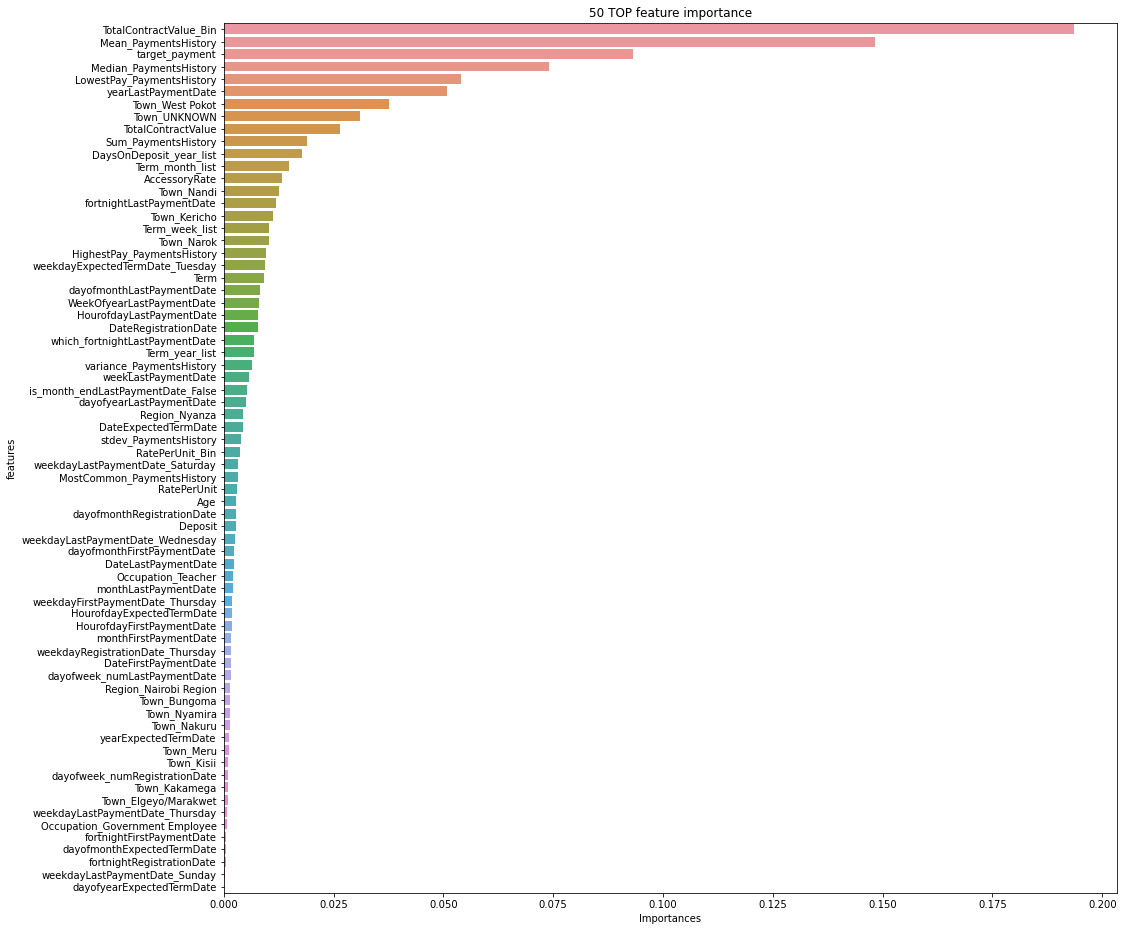

In [114]:
plt.figure(figsize=(16, 16))
sns.barplot(data=feats.sort_values(by='Importances', ascending=False).head(70), x='Importances', y='features');
plt.title('50 TOP feature importance');